# Parameter analysis and ablation, data are from Rivanna code EfficientCoT

## Parameter analysis on SVAMP-LLaMA

results are from rivanna EfficientCoT/logs/val_imp_tpkens_i and alpha_0.i

In [1]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ["/home/nee7ne"]
font_files = fm.findSystemFonts(fontpaths=font_dirs, fontext='ttf')
for font_file in font_files:
    if "emoji" in font_file.lower():
        continue
    fm.fontManager.addfont(font_file)

prop = FontProperties(fname='/home/nee7ne/TimesNewRoman.ttf')
plt.rcParams['font.family'] = prop.get_family()

# ablation on three types of variations

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

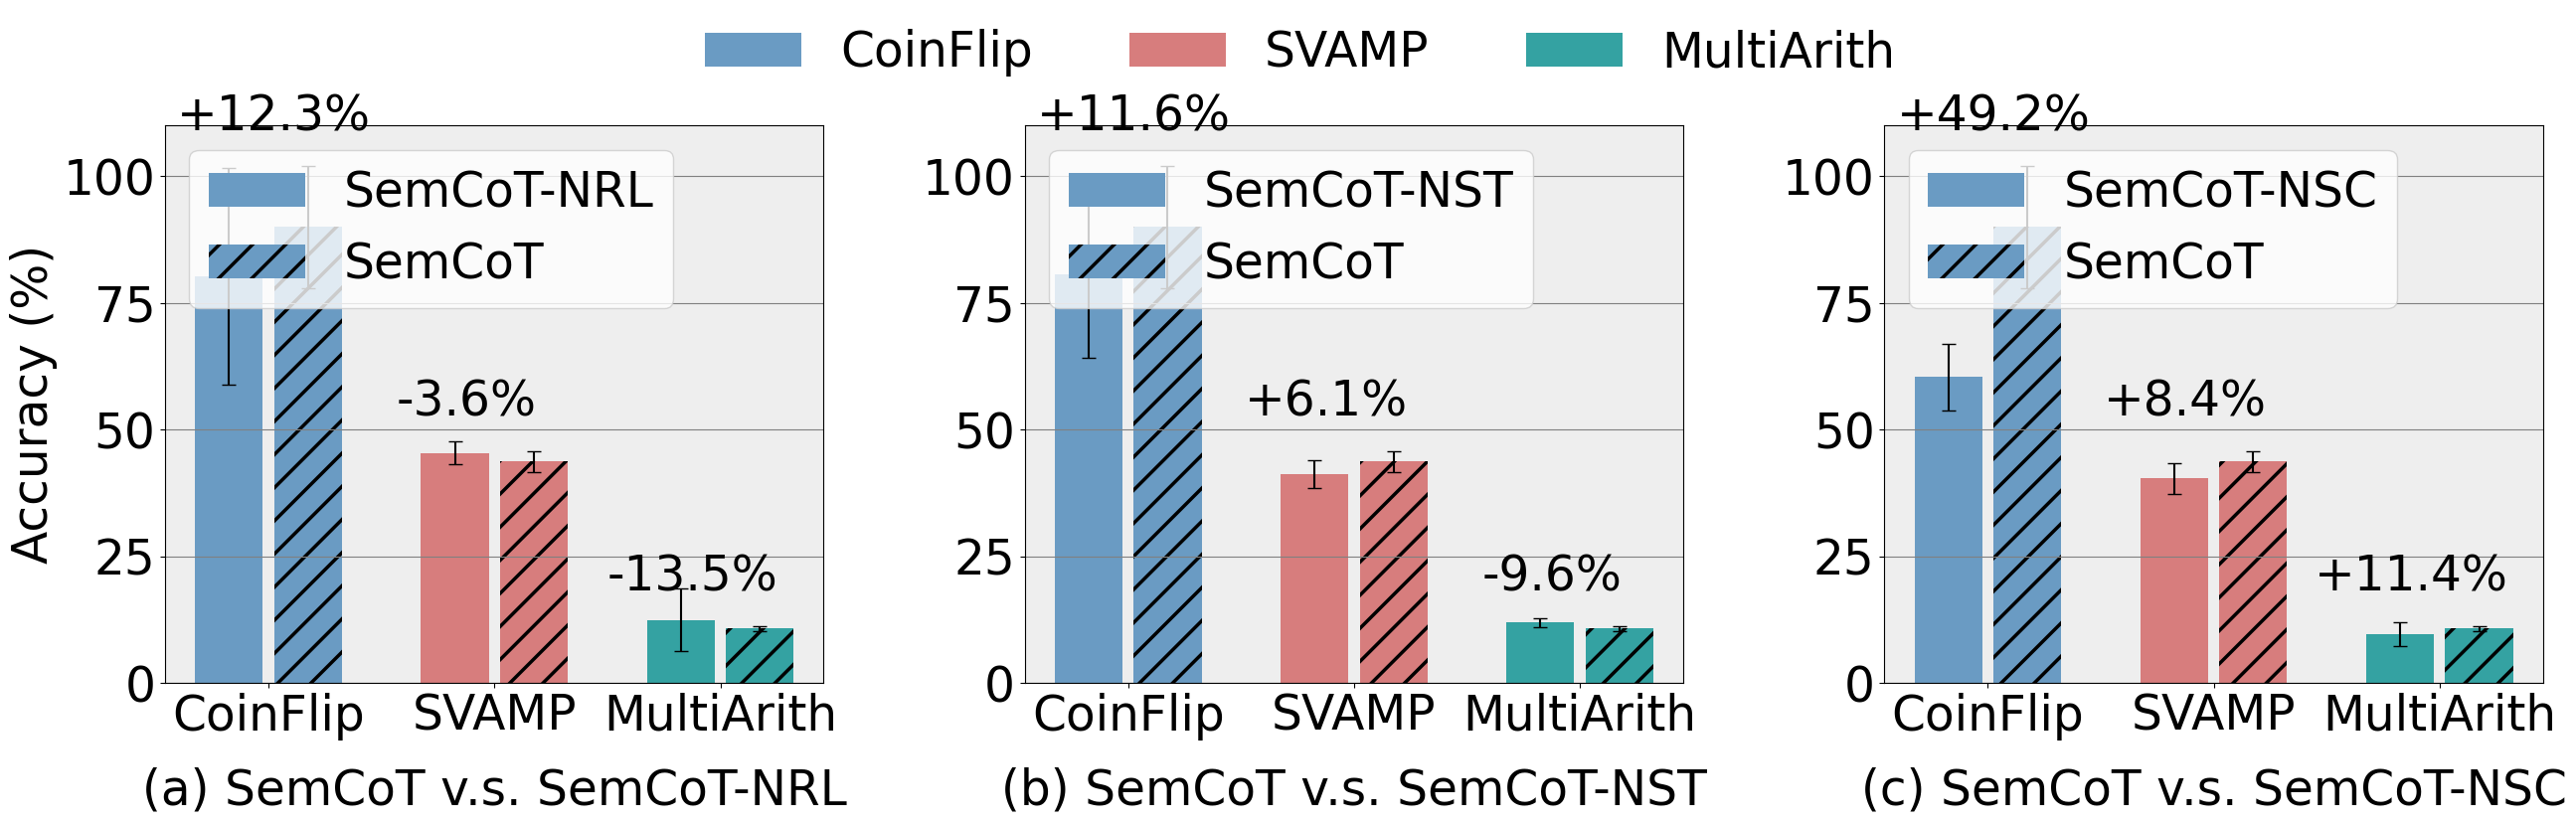

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data - Using the actual accuracy percentages
datasets = ['CoinFlip', 'SVAMP', 'MultiArith']
# Convert to percentages for consistency with the plot
values_semcot = [90.00, 43.70, 10.73]  # SemCoT
values_na = [80.17, 45.33, 12.40]  # NRL (NA)
values_ns = [80.67, 41.17, 11.87]  # NST (NS)
values_nsc = [60.33, 40.33, 9.63]  # NSC

# Define error values for each dataset (standard deviations)
# These are the actual error measurements converted to percentages
error_semcot = [12.10, 2.09, 0.52]
error_na = [21.37, 2.25, 6.16]  # NRL
error_ns = [16.58, 2.78, 0.93]  # NST
error_nsc = [6.49, 3.01, 2.34]  # NSC

# Updated Colors
custom_colors_new_order = ['#6A9BC3', '#D77D7D', '#34A2A2']

# Setting the hatch linewidth and font parameters
plt.rcParams['hatch.linewidth'] = 2.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["font.size"] = 35

# Function to calculate the percentage lead of semcot
def calculate_percentage_lead(values_gce, values_other):
    return [(gce - other) / other * 100 for gce, other in zip(values_gce, values_other)]

# Calculate the percentage leads
percentage_lead_na = calculate_percentage_lead(values_semcot, values_na)
percentage_lead_ns = calculate_percentage_lead(values_semcot, values_ns)
percentage_lead_nsc = calculate_percentage_lead(values_semcot, values_nsc)  # Calculate for NSC

# Indices for the bars
x = np.arange(len(datasets))

# Adjust the hatch density
hatch_density = '/'  # Sparser hatching
bar_width = 0.3
bar_gap = 0.05

# Create the figure and subplots (wider figsize)
fig, axs = plt.subplots(1, 3, figsize=(27, 9))

# Plot for semcot vs. semcot-NRL (No Reasoning Loss)
bars_na = axs[0].bar(x - bar_width/2-bar_gap/2, values_na, color=custom_colors_new_order, width=bar_width, alpha=1,
                     label='SemCoT-NRL', yerr=error_na, capsize=5, ecolor='black')
bars_semcot = axs[0].bar(x+bar_width/2+bar_gap/2, values_semcot, color=custom_colors_new_order, width=bar_width, alpha=1,
                        hatch=hatch_density, label='SemCoT', yerr=error_semcot, capsize=5, ecolor='black')
axs[0].set_xticks(x)
axs[0].set_xticklabels(datasets)
axs[0].set_facecolor('#eeeeee')
axs[0].yaxis.grid(color='grey')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_ylim(0, 110)  # Updated y-limit to fit the data range

# Add percentage lead text for NRL
for i in range(len(datasets)):
    if percentage_lead_na[i] > 0:
        if i == 0:
            axs[0].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_na[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[0].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_na[i]:.1f}%', ha='center', va='bottom')
    else:
        if i == 0:
            axs[0].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_na[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[0].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_na[i]:.1f}%', ha='center', va='bottom')

# Plot for semcot vs. semcot-NST (No Sentence Transformer)
bars_ns = axs[1].bar(x-bar_width/2-bar_gap/2, values_ns, color=custom_colors_new_order, width=bar_width, alpha=1,
                     label='SemCoT-NST', yerr=error_ns, capsize=5, ecolor='black')
bars_semcot = axs[1].bar(x+bar_width/2+bar_gap/2, values_semcot, color=custom_colors_new_order, width=bar_width, alpha=1,
                        hatch=hatch_density, label='SemCoT', yerr=error_semcot, capsize=5, ecolor='black')
axs[1].set_xticks(x)
axs[1].set_xticklabels(datasets)
axs[1].set_facecolor('#eeeeee')
axs[1].yaxis.grid(color='grey')
axs[1].set_ylim(0, 110)  # Updated y-limit to fit the data range

# Add percentage lead text for NST
for i in range(len(datasets)):
    if percentage_lead_ns[i] > 0:
        if i == 0:
            axs[1].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_ns[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[1].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_ns[i]:.1f}%', ha='center', va='bottom')
    else:
        if i == 0:
            axs[1].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_ns[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[1].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_ns[i]:.1f}%', ha='center', va='bottom')

# Plot for semcot vs. semcot-NSC (adding the missing third subplot)
bars_nsc = axs[2].bar(x-bar_width/2-bar_gap/2, values_nsc, color=custom_colors_new_order, width=bar_width, alpha=1,
                      label='SemCoT-NSC', yerr=error_nsc, capsize=5, ecolor='black')
bars_semcot = axs[2].bar(x+bar_width/2+bar_gap/2, values_semcot, color=custom_colors_new_order, width=bar_width, alpha=1,
                         hatch=hatch_density, label='SemCoT', yerr=error_semcot, capsize=5, ecolor='black')
axs[2].set_xticks(x)
axs[2].set_xticklabels(datasets)
axs[2].set_facecolor('#eeeeee')
axs[2].yaxis.grid(color='grey')
axs[2].set_ylim(0, 110)  # Updated y-limit to fit the data range

# Add legends for all subplots
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')  # Added legend for the third subplot

# Add percentage lead text for NSC
for i in range(len(datasets)):
    if percentage_lead_nsc[i] > 0:
        if i == 0:
            axs[2].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_nsc[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[2].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'+{percentage_lead_nsc[i]:.1f}%', ha='center', va='bottom')
    else:
        if i == 0:
            axs[2].text(x[i] + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_nsc[i]:.1f}%', ha='center', va='bottom')
        else:
            axs[2].text(x[i] - bar_width/2 + bar_gap/2, values_semcot[i] + error_semcot[i] + 5, f'{percentage_lead_nsc[i]:.1f}%', ha='center', va='bottom')


# Creating custom legend handles to match the specified colors without hatching
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=color, label=dataset) for color, dataset in zip(custom_colors_new_order, datasets)]

# Add legends outside the axes area
legend = fig.legend(handles=legend_handles, loc='upper center', ncol=len(datasets), fontsize=35, bbox_to_anchor=(0.5, 1.0065), frameon=False)

# Set titles for the subplots below the plots
axs[0].text(0.5, -0.15, '(a) SemCoT v.s. SemCoT-NRL', ha='center', va='top', transform=axs[0].transAxes, fontsize=35)  # No Reasoning Loss
axs[1].text(0.5, -0.15, '(b) SemCoT v.s. SemCoT-NST', ha='center', va='top', transform=axs[1].transAxes, fontsize=35)  # No Sentence Transformer
axs[2].text(0.5, -0.15, '(c) SemCoT v.s. SemCoT-NSC', ha='center', va='top', transform=axs[2].transAxes, fontsize=35)  # No Small Contemplation generator

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for the legend at the top

plt.show()

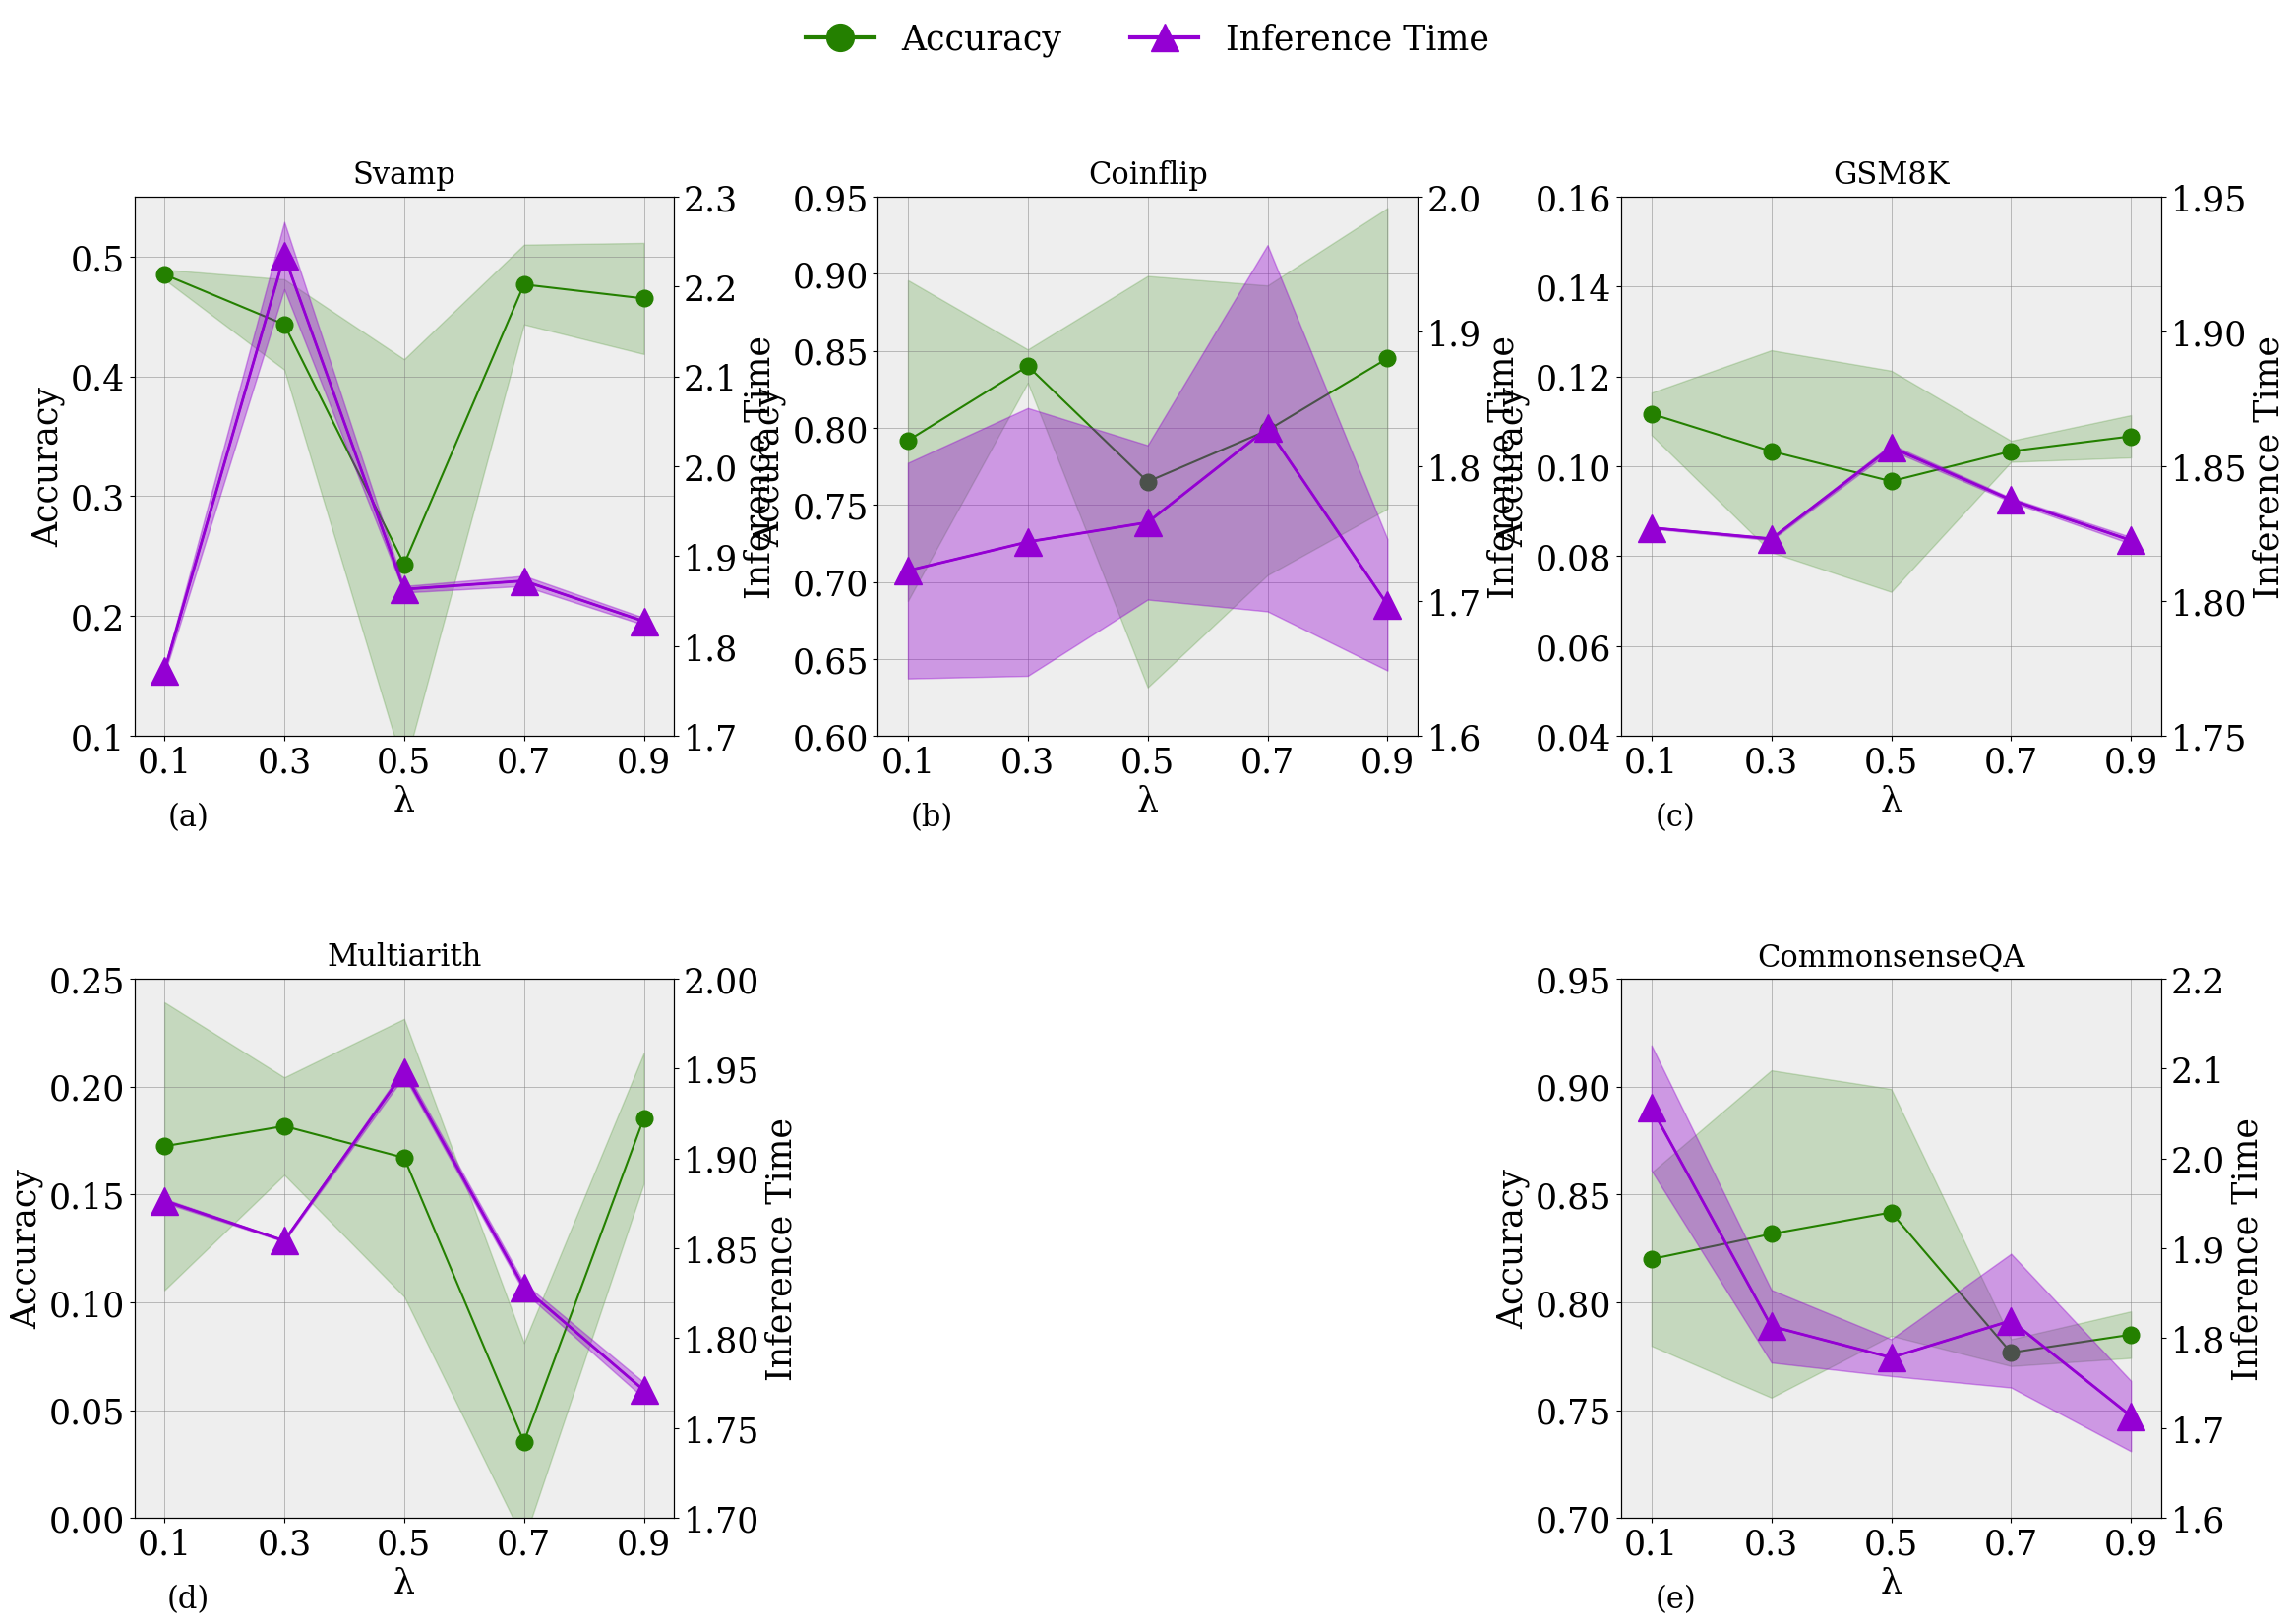

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# Font and style settings
plt.rc('font', family='Times New Roman')
plt.rcParams['hatch.linewidth'] = 2.5
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

# Colors for the plots
acc_color = '#248000'    # Green for accuracy
time_color = '#9400D3'   # Purple for inference time

# Read the CSV data - HERE'S WHERE THE DATA IS LOADED
data = pd.read_csv('/home/nee7ne/EfficientCoT/mistral_logs_rivanna/combined_alpha_results.csv')

# Get unique datasets
datasets = data['dataset'].unique()

# Create figure for 5 subplots
fig = plt.figure(figsize=(24, 16))

# Create a 2x3 grid with equal-sized cells
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

# First row - 3 subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Second row - 2 subplots (centered)
# Left subplot in the second row
ax4 = fig.add_subplot(gs[1, 0])
# Right subplot in the second row
ax5 = fig.add_subplot(gs[1, 2])

# Remove the middle subplot in the second row (to center the other two)
plt.delaxes(plt.subplot(gs[1, 1]))

# List of axes to iterate through
axes = [ax1, ax2, ax3, ax4, ax5]

# Loop through datasets and create subplots
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Filter data for current dataset
    dataset_data = data[data['dataset'] == dataset]

    # Sort by alpha
    dataset_data = dataset_data.sort_values(by='alpha')

    # Get values for plotting from the dataset
    alphas = dataset_data['alpha'].values
    acc_mean = dataset_data['num_acc_mean'].values
    acc_std = dataset_data['num_acc_std'].values
    time_mean = dataset_data['ave_time_mean'].values
    time_std = dataset_data['ave_time_std'].values

    # Create primary y-axis for accuracy
    ax.set_xlabel('λ')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(alphas)
    ax.set_facecolor('#eeeeee')
    ax.grid(color='grey')

# Set axis limits and tick parameters for better visualization
    # We'll set a consistent y-axis range for each dataset to make comparison easier
    # We need to calculate these based on the data, but ensure they're consistent

    # Set consistent axis parameters for proper visualization
    ax.set_xlim(0.05, 0.95)  # Consistent x-axis limits
    ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    ax.set_facecolor('#eeeeee')
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.7)

    # Determine appropriate y-axis limits for accuracy
    if dataset == 'svamp':
        ax.set_ylim(0.1, 0.55)
    elif dataset == 'coinflip':
        ax.set_ylim(0.6, 0.95)
    elif dataset == 'gsm8k':
        ax.set_ylim(0.04, 0.16)
    elif dataset == 'multiarith':
        ax.set_ylim(0.0, 0.25)
    elif dataset == 'comsense_qa':
        ax.set_ylim(0.7, 0.95)

    ax.tick_params(axis='y', which='both', labelleft=True, labelright=False)

    # Plot accuracy with appropriate markers and line width
    acc_line = ax.plot(alphas, acc_mean, color=acc_color, marker='o', linestyle='-',
                     markersize=12, linewidth=1.5, clip_on=False)
    ax.fill_between(alphas, acc_mean - acc_std, acc_mean + acc_std,
                   color=acc_color, alpha=0.2)

    # Create secondary y-axis for inference time
    ax_twin = ax.twinx()
    ax_twin.set_ylabel('Inference Time')

    # Set consistent y-axis limits for inference time based on dataset
    if dataset == 'svamp':
        ax_twin.set_ylim(1.7, 2.3)
    elif dataset == 'coinflip':
        ax_twin.set_ylim(1.6, 2.0)
    elif dataset == 'gsm8k':
        ax_twin.set_ylim(1.75, 1.95)
    elif dataset == 'multiarith':
        ax_twin.set_ylim(1.7, 2.0)
    elif dataset == 'comsense_qa':
        ax_twin.set_ylim(1.6, 2.2)

    ax_twin.tick_params(axis='y', which='both', left=False, right=True,
                       labelleft=False, labelright=True)

    # Plot inference time with appropriate markers and line width
    time_line = ax_twin.plot(alphas, time_mean, color=time_color, marker='^',
                            linestyle='-', markersize=12, linewidth=1.5)
    ax_twin.fill_between(alphas, time_mean - time_std, time_mean + time_std,
                        color=time_color, alpha=0.2)

    # Plot inference time with bigger markers
    time_line = ax_twin.plot(alphas, time_mean, color=time_color, marker='^',
                            linestyle='-', markersize=20, linewidth=2)
    ax_twin.fill_between(alphas, time_mean - time_std, time_mean + time_std,
                        color=time_color, alpha=0.2)

    # Set square aspect ratio for all subplots
    ax.set_box_aspect(1.0)  # Force square aspect ratio

    # Add dataset name as title (properly formatted)
    dataset_name = dataset.replace('_', ' ').title()
    if dataset == 'gsm8k':
        dataset_name = 'GSM8K'
    elif dataset == 'comsense_qa':
        dataset_name = 'CommonsenseQA'
    ax.set_title(dataset_name, fontsize=22, pad=10)

    # Add subplot label (a, b, c, d, e)
    subplot_label = chr(97 + i)  # 97 is the ASCII code for 'a'
    ax.text(0.1, -0.15, f'({subplot_label})', ha='center', va='center',
           transform=ax.transAxes, fontsize=22)

# Create common legend for all subplots
colors = [acc_color, time_color]
metrics = ['Accuracy', 'Inference Time']
markers = ['o', '^']
line_styles = ['-', '-']
legend_handles = [Line2D([0], [0], color=color, marker=marker, linestyle=line_style,
                         markersize=20, linewidth=3, label=metric)
                  for color, marker, line_style, metric in zip(colors, markers, line_styles, metrics)]

# Position the legend at the top of the figure
legend = fig.legend(handles=legend_handles, loc='upper center', ncol=len(metrics),
                    fontsize=25, bbox_to_anchor=(0.5, 1.05), frameon=False,
                    prop={"family": 'DeJavu Serif'})

# Adjust layout
plt.tight_layout()

# Add more space at the top for the legend and between subplots
plt.subplots_adjust(top=0.92, wspace=0.35, hspace=0.45)

# Save and show the figure
plt.savefig('alpha_results_visualization.pdf', bbox_inches='tight', dpi=300)
plt.show()

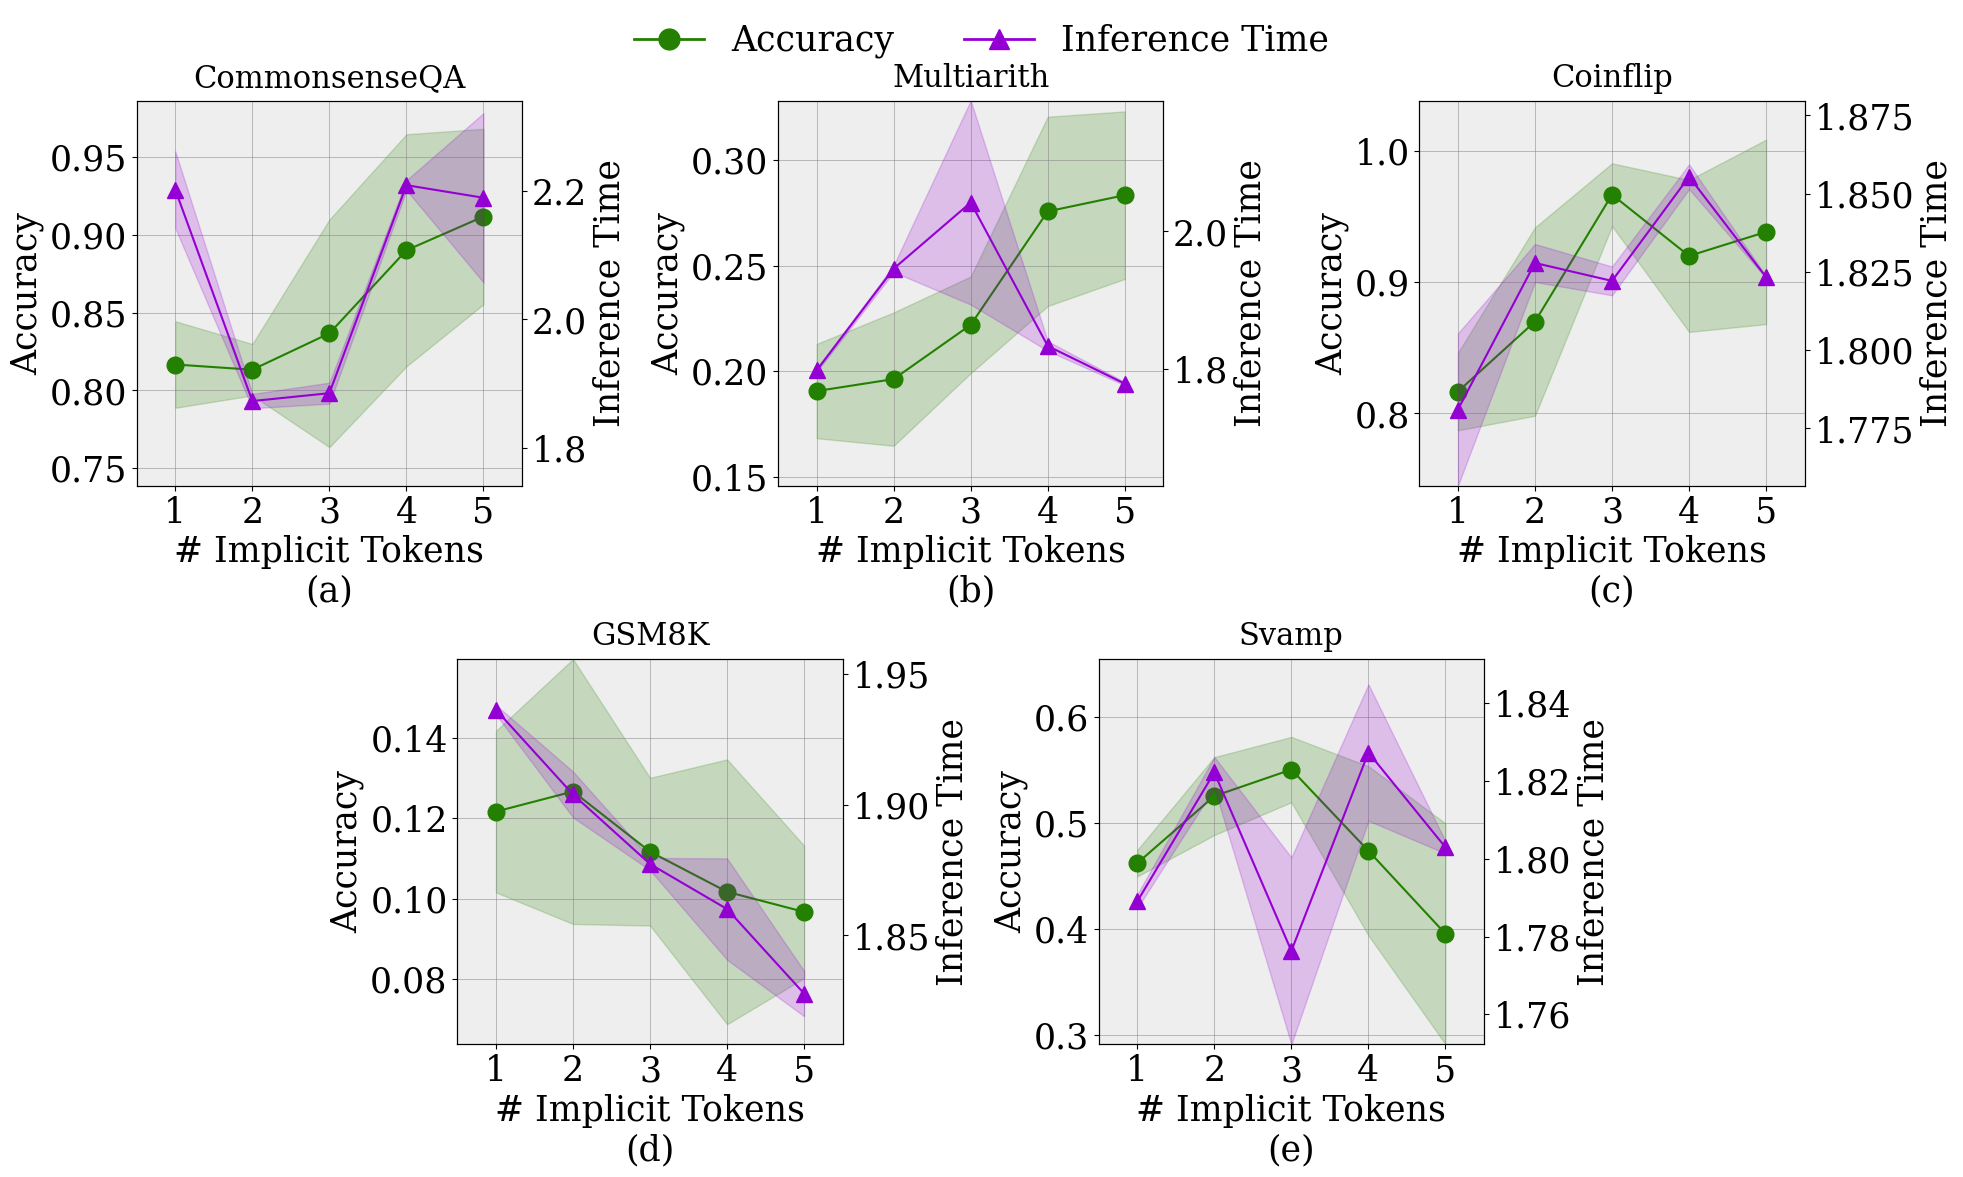

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.lines import Line2D

# Font and style settings
plt.rc('font', family='Times New Roman')
plt.rcParams['hatch.linewidth'] = 2.5
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

# Colors for the plots
acc_color = '#248000'    # Green for accuracy
time_color = '#9400D3'   # Purple for inference time

# Read the CSV data
data = pd.read_csv('/home/nee7ne/EfficientCoT/mistral_logs_rivanna/combined_val_imp_token_results.csv')

# Get unique datasets
datasets = data['dataset'].unique()

# Create figure for 5 subplots
fig = plt.figure(figsize=(21, 12))

spec = matplotlib.gridspec.GridSpec(ncols=6, nrows=2) 

ax1 = fig.add_subplot(spec[0,0:2])
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3])
ax5 = fig.add_subplot(spec[1,3:5])

# ax2.set_position((1,0,0,0))
# List of axes to iterate through
axes = [ax1, ax2, ax3, ax4, ax5]

# Loop through datasets and create subplots
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Filter data for current dataset
    dataset_data = data[data['dataset'] == dataset]

    # Sort by token
    dataset_data = dataset_data.sort_values(by='token')

    # Get values for plotting from the dataset
    tokens = dataset_data['token'].values
    acc_mean = dataset_data['num_acc_mean'].values
    acc_std = dataset_data['num_acc_std'].values
    time_mean = dataset_data['ave_time_mean'].values
    time_std = dataset_data['ave_time_std'].values

    # Create primary y-axis for accuracy
    # Add subplot label (a, b, c, d, e)
    subplot_label = chr(97 + i)  # 97 is the ASCII code for 'a'
    ax.set_xlabel('# Implicit Tokens' + f"\n({subplot_label})")
    ax.set_ylabel('Accuracy')
    ax.set_xticks(tokens)
    ax.set_facecolor('#eeeeee')
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.7)

    # Set consistent axis parameters for proper visualization
    ax.set_xlim(0.5, 5.5)  # Consistent x-axis limits

    # Determine appropriate y-axis limits for accuracy based on dataset
    ax.set_ylim(min(acc_mean) - max(acc_std), max(acc_mean) + max(acc_std))

    ax.tick_params(axis='y', which='both', labelleft=True, labelright=False)

    # Plot accuracy with appropriate markers and line width
    acc_line = ax.plot(tokens, acc_mean, color=acc_color, marker='o', linestyle='-',
                     markersize=12, linewidth=1.5, clip_on=False)
    ax.fill_between(tokens, acc_mean - acc_std, acc_mean + acc_std,
                   color=acc_color, alpha=0.2)

    # Create secondary y-axis for inference time
    ax_twin = ax.twinx()
    ax_twin.set_ylabel('Inference Time')

    # Set consistent y-axis limits for inference time based on dataset
    ax_twin.set_ylim(min(time_mean) - max(time_std), max(time_mean) + max(time_std))

    ax_twin.tick_params(axis='y', which='both', left=False, right=True,
                       labelleft=False, labelright=True)

    # Plot inference time with appropriate markers and line width
    time_line = ax_twin.plot(tokens, time_mean, color=time_color, marker='^',
                            linestyle='-', markersize=12, linewidth=1.5)
    ax_twin.fill_between(tokens, time_mean - time_std, time_mean + time_std,
                        color=time_color, alpha=0.2)

    # Set square aspect ratio for all subplots
    ax.set_box_aspect(1.0)  # Force square aspect ratio

    # Add dataset name as title (properly formatted)
    dataset_name = dataset.replace('_', ' ').title()
    if dataset == 'gsm8k':
        dataset_name = 'GSM8K'
    elif dataset == 'comsense_qa':
        dataset_name = 'CommonsenseQA'
    ax.set_title(dataset_name, fontsize=22, pad=10)
    
# Create common legend for all subplots
colors = [acc_color, time_color]
metrics = ['Accuracy', 'Inference Time']
markers = ['o', '^']
line_styles = ['-', '-']
legend_handles = [Line2D([0], [0], color=color, marker=marker, linestyle=line_style,
                         markersize=15, linewidth=2, label=metric)
                  for color, marker, line_style, metric in zip(colors, markers, line_styles, metrics)]

# Position the legend at the top of the figure
legend = fig.legend(handles=legend_handles, loc='upper center', ncol=len(metrics),
                    fontsize=25, bbox_to_anchor=(0.5, 1.01), frameon=False,
                    prop={"family": 'DeJavu Serif'})

# Adjust layout
plt.tight_layout()

# Add more space at the top for the legend and between subplots
plt.subplots_adjust(top=0.92, wspace=0.35, hspace=0.45)

# Save and show the figure
plt.savefig('/home/nee7ne/EfficientCoT/mistral_logs_rivanna/token_results_visualization.pdf', bbox_inches='tight', dpi=300)
plt.show()

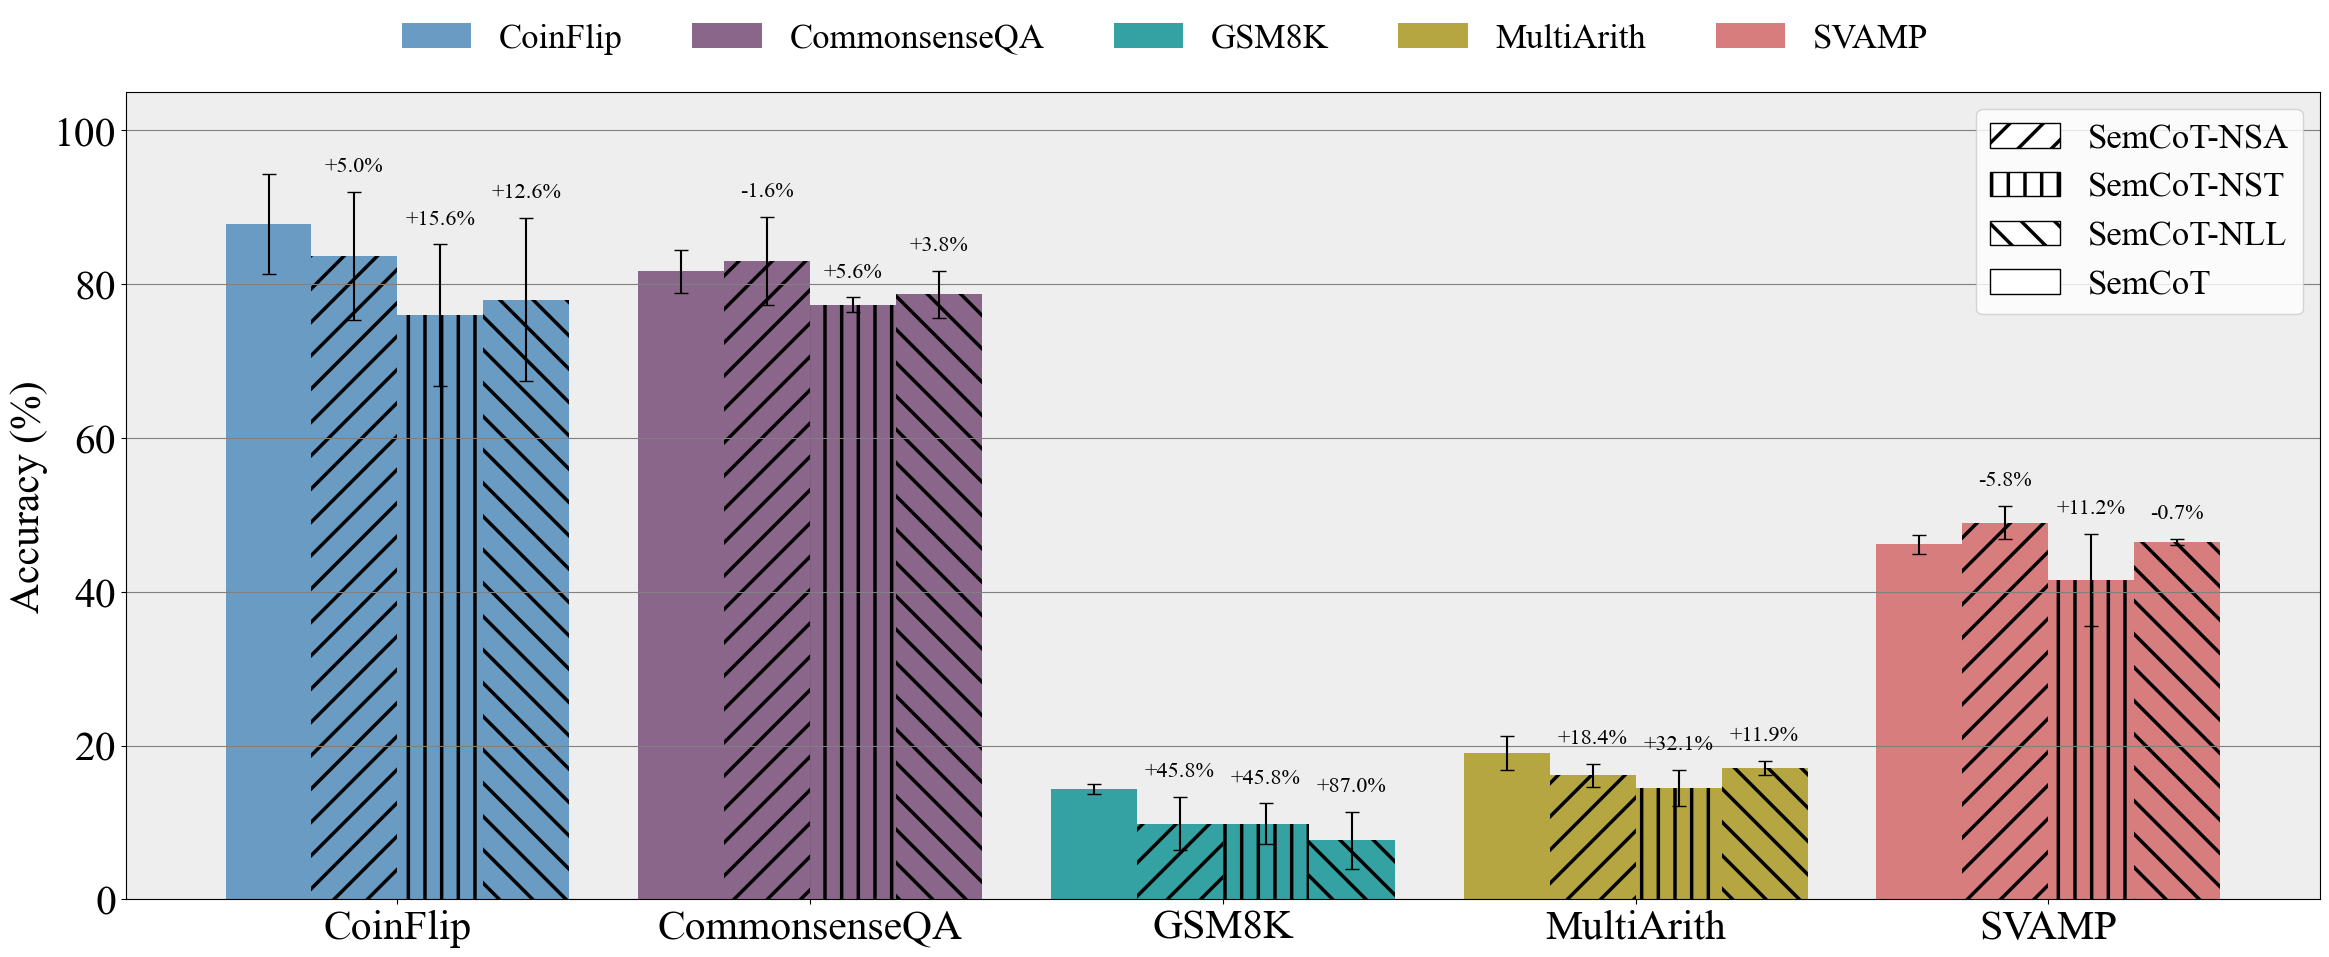

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Read the data
df = pd.read_csv('/home/nee7ne/EfficientCoT/llama_logs_rivanna/ablation_combined_results.csv')

# Convert accuracy to percentages for better visualization
df['num_acc_mean'] = df['num_acc_mean'] * 100
df['num_acc_std'] = df['num_acc_std'] * 100

# Rename variations for clearer labels
variation_mapping = {
    'vanilla': 'SemCoT',
    'alpha_025_variation_no_l_reason': 'SemCoT-NRL',
    'alpha_025_variation_no_sentence_transformer': 'SemCoT-NST',
    'alpha_025_variation_no_small_contemp_gen': 'SemCoT-NSC'
}

# Apply the mapping
df['variation_label'] = df['variation'].map(variation_mapping)

# Get all unique datasets
datasets_to_plot = ['coin_flip', 'svamp', 'gsm8k', 'multi_arith', 'comsense_qa']
display_names = {
    'coin_flip': 'CoinFlip',
    'svamp': 'SVAMP',
    'gsm8k': 'GSM8K',
    'multi_arith': 'MultiArith',
    'comsense_qa': 'CommonsenseQA'
}

# Filter data to include only selected datasets
df_filtered = df[df['dataset'].isin(datasets_to_plot)]

# Setting the style parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30
plt.rcParams['hatch.linewidth'] = 2.5

# Custom colors for datasets - matching original palette
custom_colors = {
    'coin_flip': '#6A9BC3',  # Blue
    'svamp': '#D77D7D',     # Red
    'gsm8k': '#34A2A2',     # Teal
    'multi_arith': '#B5A642', # Gold
    'comsense_qa': '#8B668B' # Purple
}

# Create a single figure with one subplot
fig, ax = plt.subplots(figsize=(24, 10))

# Define bar width and spacing
bar_width = 0.25  # Make bars a bit wider
group_spacing = 1.2  # Space between dataset groups
hatch_density = '/'

# Variations to include in the plot
variations = ['SemCoT', 'SemCoT-NRL', 'SemCoT-NST', 'SemCoT-NSC']

# Organize data for easier access
data_by_dataset_variation = {}
for dataset in datasets_to_plot:
    data_by_dataset_variation[dataset] = {}
    for _, row in df_filtered[df_filtered['dataset'] == dataset].iterrows():import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clear any existing plots to avoid empty figures
plt.close('all')

# Read the data
df = pd.read_csv('/home/nee7ne/EfficientCoT/mistral_logs_rivanna/ablation_combined_results.csv')

# Convert accuracy to percentages for better visualization
df['num_acc_mean'] = df['num_acc_mean'] * 100
df['num_acc_std'] = df['num_acc_std'] * 100

# Rename variations for clearer labels
variation_mapping = {
    'vanilla': 'SemCoT',
    'alpha_025_variation_no_l_reason': 'SemCoT-NSA',
    'alpha_025_variation_no_sentence_transformer': 'SemCoT-NST',
    'alpha_025_variation_no_small_contemp_gen': 'SemCoT-NLL'
}

# Apply the mapping
df['variation_label'] = df['variation'].map(variation_mapping)

# Get all unique datasets
datasets_to_plot = ['coin_flip', 'comsense_qa', 'gsm8k', 'multi_arith','svamp']
display_names = {
    'coin_flip': 'CoinFlip',
    'svamp': 'SVAMP',
    'gsm8k': 'GSM8K',
    'multi_arith': 'MultiArith',
    'comsense_qa': 'CommonsenseQA'
}

# Filter data to include only selected datasets
df_filtered = df[df['dataset'].isin(datasets_to_plot)]

# Setting the style parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30
plt.rcParams['hatch.linewidth'] = 2.5

# Custom colors for datasets - matching original palette
custom_colors = {
    'coin_flip': '#6A9BC3',  # Blue
    'svamp': '#D77D7D',     # Red
    'gsm8k': '#34A2A2',     # Teal
    'multi_arith': '#B5A642', # Gold
    'comsense_qa': '#8B668B' # Purple
}

# Create a single figure with one subplot - use figure() explicitly
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(111)  # Add a single subplot

# Define bar width and spacing
bar_width = 0.25  # Make bars a bit wider
group_spacing = 1.2  # Space between dataset groups
hatch_density = '/'

# Variations to include in the plot
variations = ['SemCoT', 'SemCoT-NSA', 'SemCoT-NST', 'SemCoT-NLL']
hatch_map = {'SemCoT':None, 'SemCoT-NSA':'/', 'SemCoT-NST':'|', 'SemCoT-NLL':'\\'}

# Organize data for easier access
data_by_dataset_variation = {}
for dataset in datasets_to_plot:
    data_by_dataset_variation[dataset] = {}
    for _, row in df_filtered[df_filtered['dataset'] == dataset].iterrows():
        variation = row['variation_label']
        if variation in variations:  # Only include our selected variations
            data_by_dataset_variation[dataset][variation] = {
                'mean': row['num_acc_mean'],
                'std': row['num_acc_std']
            }

# X positions for each dataset cluster
x = np.arange(len(datasets_to_plot)) * group_spacing

# Plot bars for each variation
for i, variation in enumerate(variations):
    # Position within each group
    offset = (i - 1.5) * bar_width

    # Collect values and errors for this variation across all datasets
    values = []
    errors = []

    for dataset in datasets_to_plot:
        if variation in data_by_dataset_variation[dataset]:
            values.append(data_by_dataset_variation[dataset][variation]['mean'])
            errors.append(data_by_dataset_variation[dataset][variation]['std'])
        else:
            values.append(0)
            errors.append(0)

    # Calculate position for this set of bars
    pos = x + offset

    # Add hatching only for SemCoT bars
    hatch = hatch_density if variation == 'SemCoT' else None

    # Plot bars for this variation across all datasets
    bars = ax.bar(pos, values, bar_width, yerr=errors, capsize=5,
                  label=variation, hatch=hatch_map[variation],
                  color=[custom_colors[dataset] for dataset in datasets_to_plot])

# Calculate percentage differences between SemCoT and each variant
for dataset_idx, dataset in enumerate(datasets_to_plot):
    semcot_value = data_by_dataset_variation[dataset].get('SemCoT', {}).get('mean', 0)
    semcot_error = data_by_dataset_variation[dataset].get('SemCoT', {}).get('std', 0)
    
    # For each variant
    for var_idx, variant in enumerate(variations[1:], 1):  # Skip SemCoT itself
        if variant in data_by_dataset_variation[dataset] and 'SemCoT' in data_by_dataset_variation[dataset]:
            variant_value = data_by_dataset_variation[dataset][variant]['mean']
            variant_error = data_by_dataset_variation[dataset][variant]['std']

            if variant_value > 0:
                # Calculate percentage difference
                percentage_diff = ((semcot_value - variant_value) / variant_value) * 100

                # Format percentage text
                if percentage_diff > 0:
                    text = f'+{percentage_diff:.1f}%'
                else:
                    text = f'{percentage_diff:.1f}%'

                # Position of text - half way between the two bars for this comparison
                semcot_pos = x[dataset_idx] + (-1.5) * bar_width  # SemCoT position
                variant_pos = x[dataset_idx] + (var_idx - 1.5) * bar_width  # Variant position
                # Position text above the higher bar
                # if semcot_value > variant_value:
                #     y_pos = semcot_value + semcot_error + 2
                # else:
                y_pos = variant_value + variant_error + 2
                x_pos = variant_pos

                # Add percentage text
                ax.text(x_pos, y_pos, text, ha='center', va='bottom', fontsize=16)

# Configure axis
ax.set_ylabel('Accuracy (%)', fontsize=30)
ax.set_ylim(0, 105)  # Adjust based on the maximum value in your data
ax.set_xticks(x)
ax.set_xticklabels([display_names[dataset] for dataset in datasets_to_plot], fontsize=30)
ax.set_facecolor('#eeeeee')
ax.yaxis.grid(color='grey')

# Add legend with clearer positioning
variation_handles = [Patch(edgecolor="#000000", facecolor="#FFFFFF", label=variation, hatch=hatch_map[variation])
                  for variation in data_by_dataset_variation[dataset]]
legend = ax.legend(handles=variation_handles, fontsize=25, loc='upper right')

# Add a color legend for datasets at the top
from matplotlib.patches import Patch
dataset_handles = [Patch(facecolor=custom_colors[dataset], label=display_names[dataset])
                  for dataset in datasets_to_plot]
dataset_legend = fig.legend(handles=dataset_handles,
                           loc='upper center',
                           ncol=len(datasets_to_plot),
                           fontsize=25,
                           bbox_to_anchor=(0.5, 1.00),
                           frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for dataset legend

# Make sure to close any unused figures before saving
plt.savefig('/home/nee7ne/EfficientCoT/mistral_logs_rivanna/semcot_comparison_all_datasets.pdf', dpi=300, bbox_inches='tight')

# Show only the specific figure we created
plt.show()

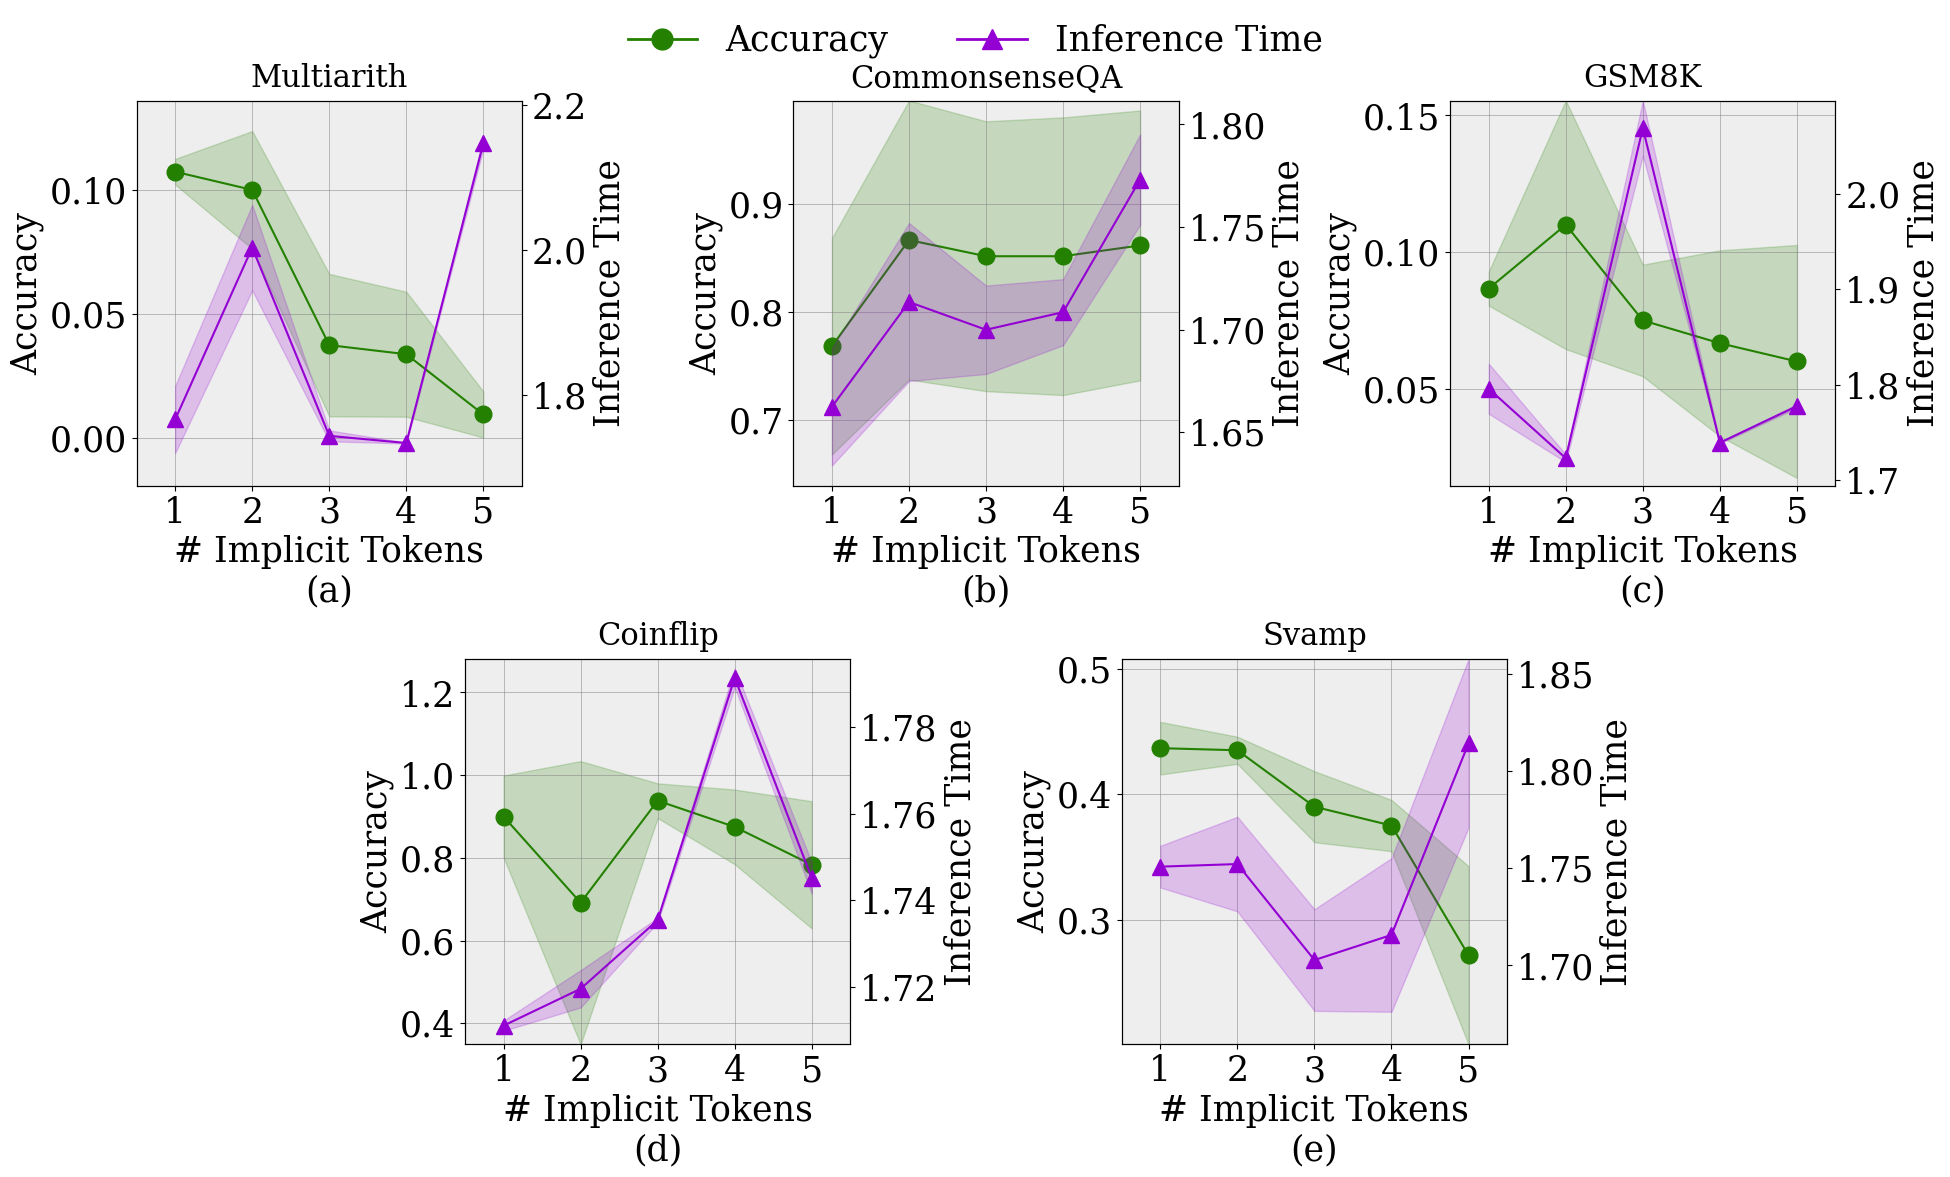

In [129]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.lines import Line2D

# Font and style settings
plt.rc('font', family='Times New Roman')
plt.rcParams['hatch.linewidth'] = 2.5
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 25

# Colors for the plots
acc_color = '#248000'    # Green for accuracy
time_color = '#9400D3'   # Purple for inference time

# Read the CSV data
data = pd.read_csv('/home/nee7ne/EfficientCoT/llama_logs_rivanna/combined_val_imp_token_results.csv')

# Get unique datasets
datasets = data['dataset'].unique()

# Create figure for 5 subplots
fig = plt.figure(figsize=(21, 12))

spec = matplotlib.gridspec.GridSpec(ncols=6, nrows=2) 

ax1 = fig.add_subplot(spec[0,0:2])
ax2 = fig.add_subplot(spec[0,2:4])
ax3 = fig.add_subplot(spec[0,4:])
ax4 = fig.add_subplot(spec[1,1:3])
ax5 = fig.add_subplot(spec[1,3:5])

# ax2.set_position((1,0,0,0))
# List of axes to iterate through
axes = [ax1, ax2, ax3, ax4, ax5]

# Loop through datasets and create subplots
for i, (ax, dataset) in enumerate(zip(axes, datasets)):
    # Filter data for current dataset
    dataset_data = data[data['dataset'] == dataset]

    # Sort by token
    dataset_data = dataset_data.sort_values(by='token')

    # Get values for plotting from the dataset
    tokens = dataset_data['token'].values
    acc_mean = dataset_data['num_acc_mean'].values
    acc_std = dataset_data['num_acc_std'].values
    time_mean = dataset_data['ave_time_mean'].values
    time_std = dataset_data['ave_time_std'].values

    # Create primary y-axis for accuracy
    # Add subplot label (a, b, c, d, e)
    subplot_label = chr(97 + i)  # 97 is the ASCII code for 'a'
    ax.set_xlabel('# Implicit Tokens' + f"\n({subplot_label})")
    ax.set_ylabel('Accuracy')
    ax.set_xticks(tokens)
    ax.set_facecolor('#eeeeee')
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.7)

    # Set consistent axis parameters for proper visualization
    ax.set_xlim(0.5, 5.5)  # Consistent x-axis limits

    # Determine appropriate y-axis limits for accuracy based on dataset
    ax.set_ylim(min(acc_mean) - max(acc_std), max(acc_mean) + max(acc_std))

    ax.tick_params(axis='y', which='both', labelleft=True, labelright=False)

    # Plot accuracy with appropriate markers and line width
    acc_line = ax.plot(tokens, acc_mean, color=acc_color, marker='o', linestyle='-',
                     markersize=12, linewidth=1.5, clip_on=False)
    ax.fill_between(tokens, acc_mean - acc_std, acc_mean + acc_std,
                   color=acc_color, alpha=0.2)

    # Create secondary y-axis for inference time
    ax_twin = ax.twinx()
    ax_twin.set_ylabel('Inference Time')

    # Set consistent y-axis limits for inference time based on dataset
    ax_twin.set_ylim(min(time_mean) - max(time_std), max(time_mean) + max(time_std))

    ax_twin.tick_params(axis='y', which='both', left=False, right=True,
                       labelleft=False, labelright=True)

    # Plot inference time with appropriate markers and line width
    time_line = ax_twin.plot(tokens, time_mean, color=time_color, marker='^',
                            linestyle='-', markersize=12, linewidth=1.5)
    ax_twin.fill_between(tokens, time_mean - time_std, time_mean + time_std,
                        color=time_color, alpha=0.2)

    # Set square aspect ratio for all subplots
    ax.set_box_aspect(1.0)  # Force square aspect ratio

    # Add dataset name as title (properly formatted)
    dataset_name = dataset.replace('_', ' ').title()
    if dataset == 'gsm8k':
        dataset_name = 'GSM8K'
    elif dataset == 'comsense_qa':
        dataset_name = 'CommonsenseQA'
    ax.set_title(dataset_name, fontsize=22, pad=10)
    
# Create common legend for all subplots
colors = [acc_color, time_color]
metrics = ['Accuracy', 'Inference Time']
markers = ['o', '^']
line_styles = ['-', '-']
legend_handles = [Line2D([0], [0], color=color, marker=marker, linestyle=line_style,
                         markersize=15, linewidth=2, label=metric)
                  for color, marker, line_style, metric in zip(colors, markers, line_styles, metrics)]

# Position the legend at the top of the figure
legend = fig.legend(handles=legend_handles, loc='upper center', ncol=len(metrics),
                    fontsize=25, bbox_to_anchor=(0.5, 1.01), frameon=False,
                    prop={"family": 'DeJavu Serif'})

# Adjust layout
plt.tight_layout()

# Add more space at the top for the legend and between subplots
plt.subplots_adjust(top=0.92, wspace=0.35, hspace=0.45)

# Save and show the figure
plt.savefig('/home/nee7ne/EfficientCoT/llama_logs_rivanna/token_results_visualization.pdf', bbox_inches='tight', dpi=300)
plt.show()

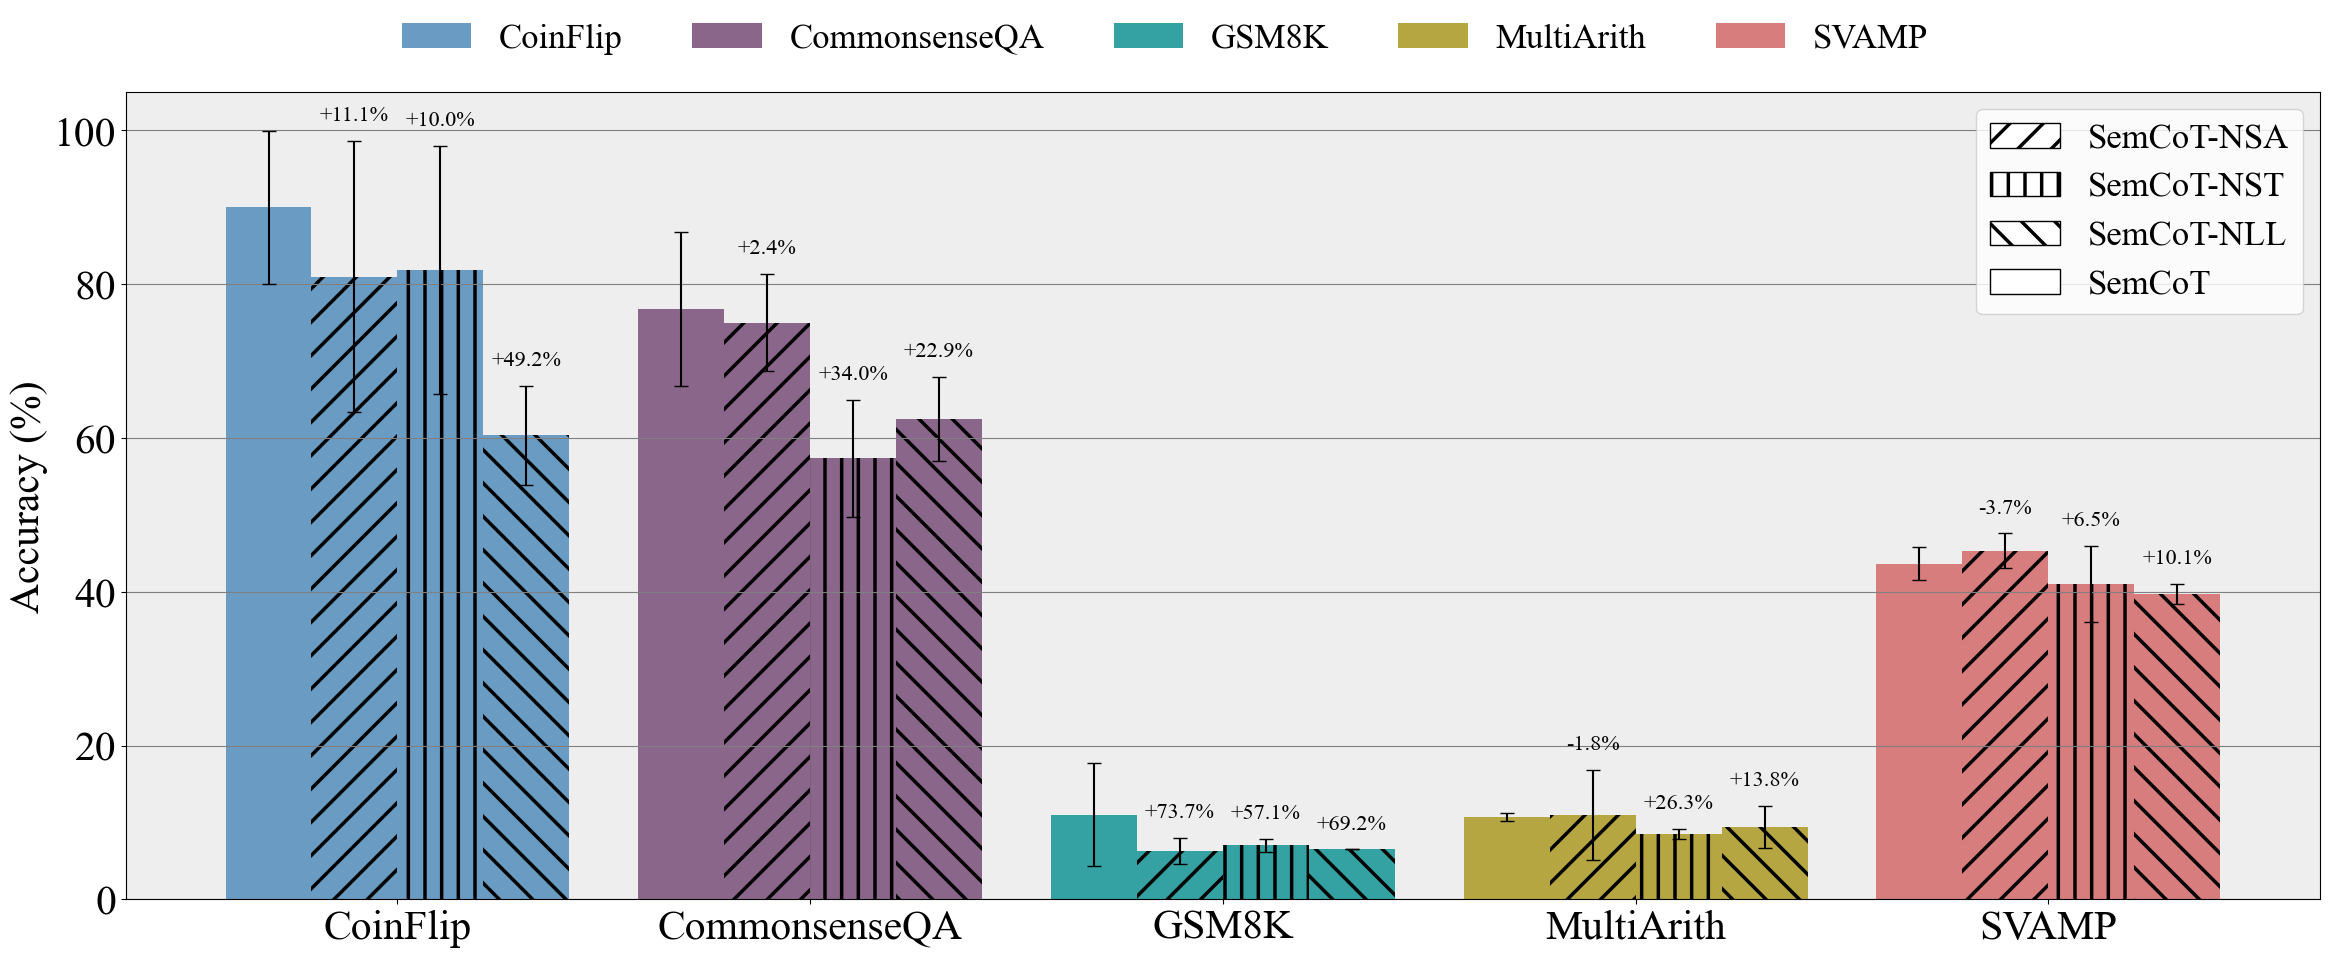

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the data
df = pd.read_csv('/home/nee7ne/EfficientCoT/llama_logs_rivanna/ablation_combined_results.csv')

# Convert accuracy to percentages for better visualization
df['num_acc_mean'] = df['num_acc_mean'] * 100
df['num_acc_std'] = df['num_acc_std'] * 100

# Rename variations for clearer labels
variation_mapping = {
    'vanilla': 'SemCoT',
    'alpha_025_variation_no_l_reason': 'SemCoT-NRL',
    'alpha_025_variation_no_sentence_transformer': 'SemCoT-NST',
    'alpha_025_variation_no_small_contemp_gen': 'SemCoT-NSC'
}

# Apply the mapping
df['variation_label'] = df['variation'].map(variation_mapping)

# Get all unique datasets
datasets_to_plot = ['coin_flip', 'svamp', 'gsm8k', 'multi_arith', 'comsense_qa']
display_names = {
    'coin_flip': 'CoinFlip',
    'svamp': 'SVAMP',
    'gsm8k': 'GSM8K',
    'multi_arith': 'MultiArith',
    'comsense_qa': 'CommonsenseQA'
}

# Filter data to include only selected datasets
df_filtered = df[df['dataset'].isin(datasets_to_plot)]

# Setting the style parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30
plt.rcParams['hatch.linewidth'] = 2.5

# Custom colors for datasets - matching original palette
custom_colors = {
    'coin_flip': '#6A9BC3',  # Blue
    'svamp': '#D77D7D',     # Red
    'gsm8k': '#34A2A2',     # Teal
    'multi_arith': '#B5A642', # Gold
    'comsense_qa': '#8B668B' # Purple
}

# Create a single figure with one subplot
fig, ax = plt.subplots(figsize=(24, 10))

# Define bar width and spacing
bar_width = 0.25  # Make bars a bit wider
group_spacing = 1.2  # Space between dataset groups
hatch_density = '/'

# Variations to include in the plot
variations = ['SemCoT', 'SemCoT-NRL', 'SemCoT-NST', 'SemCoT-NSC']

# Organize data for easier access
data_by_dataset_variation = {}
for dataset in datasets_to_plot:
    data_by_dataset_variation[dataset] = {}
    for _, row in df_filtered[df_filtered['dataset'] == dataset].iterrows():import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clear any existing plots to avoid empty figures
plt.close('all')

# Read the data
df = pd.read_csv('/home/nee7ne/EfficientCoT/llama_logs_rivanna/ablation_combined_results.csv')

# Convert accuracy to percentages for better visualization
df['num_acc_mean'] = df['num_acc_mean'] * 100
df['num_acc_std'] = df['num_acc_std'] * 100

# Rename variations for clearer labels
variation_mapping = {
    'vanilla': 'SemCoT',
    'alpha_025_variation_no_l_reason': 'SemCoT-NSA',
    'alpha_025_variation_no_sentence_transformer': 'SemCoT-NST',
    'alpha_025_variation_no_small_contemp_gen': 'SemCoT-NLL'
}

# Apply the mapping
df['variation_label'] = df['variation'].map(variation_mapping)

# Get all unique datasets
datasets_to_plot = ['coin_flip', 'comsense_qa', 'gsm8k', 'multi_arith','svamp']
display_names = {
    'coin_flip': 'CoinFlip',
    'svamp': 'SVAMP',
    'gsm8k': 'GSM8K',
    'multi_arith': 'MultiArith',
    'comsense_qa': 'CommonsenseQA'
}

# Filter data to include only selected datasets
df_filtered = df[df['dataset'].isin(datasets_to_plot)]

# Setting the style parameters
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30
plt.rcParams['hatch.linewidth'] = 2.5

# Custom colors for datasets - matching original palette
custom_colors = {
    'coin_flip': '#6A9BC3',  # Blue
    'svamp': '#D77D7D',     # Red
    'gsm8k': '#34A2A2',     # Teal
    'multi_arith': '#B5A642', # Gold
    'comsense_qa': '#8B668B' # Purple
}

# Create a single figure with one subplot - use figure() explicitly
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(111)  # Add a single subplot

# Define bar width and spacing
bar_width = 0.25  # Make bars a bit wider
group_spacing = 1.2  # Space between dataset groups
hatch_density = '/'

# Variations to include in the plot
variations = ['SemCoT', 'SemCoT-NSA', 'SemCoT-NST', 'SemCoT-NLL']
hatch_map = {'SemCoT':None, 'SemCoT-NSA':'/', 'SemCoT-NST':'|', 'SemCoT-NLL':'\\'}

# Organize data for easier access
data_by_dataset_variation = {}
for dataset in datasets_to_plot:
    data_by_dataset_variation[dataset] = {}
    for _, row in df_filtered[df_filtered['dataset'] == dataset].iterrows():
        variation = row['variation_label']
        if variation in variations:  # Only include our selected variations
            data_by_dataset_variation[dataset][variation] = {
                'mean': row['num_acc_mean'],
                'std': row['num_acc_std']
            }

# X positions for each dataset cluster
x = np.arange(len(datasets_to_plot)) * group_spacing

# Plot bars for each variation
for i, variation in enumerate(variations):
    # Position within each group
    offset = (i - 1.5) * bar_width

    # Collect values and errors for this variation across all datasets
    values = []
    errors = []

    for dataset in datasets_to_plot:
        if variation in data_by_dataset_variation[dataset]:
            values.append(data_by_dataset_variation[dataset][variation]['mean'])
            errors.append(data_by_dataset_variation[dataset][variation]['std'])
        else:
            values.append(0)
            errors.append(0)

    # Calculate position for this set of bars
    pos = x + offset

    # Add hatching only for SemCoT bars
    hatch = hatch_density if variation == 'SemCoT' else None

    # Plot bars for this variation across all datasets
    bars = ax.bar(pos, values, bar_width, yerr=errors, capsize=5,
                  label=variation, hatch=hatch_map[variation],
                  color=[custom_colors[dataset] for dataset in datasets_to_plot])

# Calculate percentage differences between SemCoT and each variant
for dataset_idx, dataset in enumerate(datasets_to_plot):
    semcot_value = data_by_dataset_variation[dataset].get('SemCoT', {}).get('mean', 0)
    semcot_error = data_by_dataset_variation[dataset].get('SemCoT', {}).get('std', 0)
    
    # For each variant
    for var_idx, variant in enumerate(variations[1:], 1):  # Skip SemCoT itself
        if variant in data_by_dataset_variation[dataset] and 'SemCoT' in data_by_dataset_variation[dataset]:
            variant_value = data_by_dataset_variation[dataset][variant]['mean']
            variant_error = data_by_dataset_variation[dataset][variant]['std']

            if variant_value > 0:
                # Calculate percentage difference
                percentage_diff = ((semcot_value - variant_value) / variant_value) * 100

                # Format percentage text
                if percentage_diff > 0:
                    text = f'+{percentage_diff:.1f}%'
                else:
                    text = f'{percentage_diff:.1f}%'

                # Position of text - half way between the two bars for this comparison
                semcot_pos = x[dataset_idx] + (-1.5) * bar_width  # SemCoT position
                variant_pos = x[dataset_idx] + (var_idx - 1.5) * bar_width  # Variant position
                # Position text above the higher bar
                # if semcot_value > variant_value:
                #     y_pos = semcot_value + semcot_error + 2
                # else:
                y_pos = variant_value + variant_error + 2
                x_pos = variant_pos

                # Add percentage text
                ax.text(x_pos, y_pos, text, ha='center', va='bottom', fontsize=16)

# Configure axis
ax.set_ylabel('Accuracy (%)', fontsize=30)
ax.set_ylim(0, 105)  # Adjust based on the maximum value in your data
ax.set_xticks(x)
ax.set_xticklabels([display_names[dataset] for dataset in datasets_to_plot], fontsize=30)
ax.set_facecolor('#eeeeee')
ax.yaxis.grid(color='grey')

# Add legend with clearer positioning
variation_handles = [Patch(edgecolor="#000000", facecolor="#FFFFFF", label=variation, hatch=hatch_map[variation])
                  for variation in data_by_dataset_variation[dataset]]
legend = ax.legend(handles=variation_handles, fontsize=25, loc='upper right')

# Add a color legend for datasets at the top
from matplotlib.patches import Patch
dataset_handles = [Patch(facecolor=custom_colors[dataset], label=display_names[dataset])
                  for dataset in datasets_to_plot]
dataset_legend = fig.legend(handles=dataset_handles,
                           loc='upper center',
                           ncol=len(datasets_to_plot),
                           fontsize=25,
                           bbox_to_anchor=(0.5, 1.00),
                           frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for dataset legend

# Make sure to close any unused figures before saving
plt.savefig('/home/nee7ne/EfficientCoT/llama_logs_rivanna/semcot_comparison_all_datasets.pdf', dpi=300, bbox_inches='tight')

# Show only the specific figure we created
plt.show()

In [ ]:
# process results for llama
import json
import os
import numpy as np
temp_map = {"gsm8k":0.5, "svamp":0.1, "multi_arith":0.9, "comsense_qa":0.5, "coin_flip":0.7}
data_map = {"coinflip":"coin_flip", "comsense_qa":"comsense_qa", "multiarith":"multi_arith", "gsm8k":"gsm8k", "svamp":"svamp"}

root_path = "/home/nee7ne/EfficientCoT/llama_logs_rivanna"
variant_folders = ['alpha_025_variation_no_l_reason', 'alpha_025_variation_no_sentence_transformer', 'alpha_025_variation_no_small_contemp_gen']
res = {}
for variant in variant_folders:
    res[variant] = {}
    for dataset in os.listdir(f"{root_path}/{variant}"):
        d = dataset.split("data_")[-1]
        with open(f"{root_path}/{variant}/{dataset}/output.log") as f:
            lines = [json.loads(l.split("Evaluation results: ")[-1].replace("'", '"')) for l in f.readlines() if "numerical_accuracy" in l]
        summary = {}
        for l in lines:
            if l['eval_temp'] not in summary:
                summary[l['eval_temp']] = {"acc": [], "time":[]}
            summary[l['eval_temp']]['acc'].append(l['numerical_accuracy'])
            summary[l['eval_temp']]['time'].append(l['ave_sample_time'])
        best_temp = temp_map[d]
        res[variant][d] = {"acc_mean": np.mean(summary[best_temp]['acc']), "acc_std": np.std(summary[best_temp]['acc']), "time_mean": np.mean(summary[best_temp]['time']), "time_std": np.std(summary[best_temp]['time'])}
for dataset in os.listdir(f"{root_path}/variation_no_small_contemp_gen"):
    d = dataset.split("data_")[-1]
    if d in res[variant] or d == "output.log":
        continue
    with open(f"{root_path}/variation_no_small_contemp_gen/{dataset}/output.log") as f:
        lines = [json.loads(l.split("Evaluation results: ")[-1].replace("'", '"')) for l in f.readlines() if "numerical_accuracy" in l]
    summary = {}
    for l in lines:
        if l['eval_temp'] not in summary:
            summary[l['eval_temp']] = {"acc": [], "time":[]}
        summary[l['eval_temp']]['acc'].append(l['numerical_accuracy'])
        summary[l['eval_temp']]['time'].append(l['ave_sample_time'])
    res[variant][d] = {"acc_mean": np.mean(summary[best_temp]['acc']), "acc_std": np.std(summary[best_temp]['acc']), "time_mean": np.mean(summary[best_temp]['time']), "time_std": np.std(summary[best_temp]['time'])}

res['vanilla'] = {}
for dataset in ['vanilla_coinflip', 'vanilla_comsense_qa', 'vanilla_gsm8k', 'vanilla_multiarith', 'vanilla_svamp']:
    d = data_map[dataset.split("vanilla_")[-1]]
    with open(f"{root_path}/{dataset}/output.log") as f:
        lines = [json.loads(l.split("Evaluation results: ")[-1].replace("'", '"')) for l in f.readlines() if "numerical_accuracy" in l]
    summary = {}
    for l in lines:
        if l['eval_temp'] not in summary:
            summary[l['eval_temp']] = {"acc": [], "time":[]}
        summary[l['eval_temp']]['acc'].append(l['numerical_accuracy'])
        summary[l['eval_temp']]['time'].append(l['ave_sample_time'])
    best_temp, max_acc = 0, 0
    for temp in summary:
        if np.mean(summary[temp]['acc']) > max_acc:
            best_temp = temp
            max_acc = np.mean(summary[temp]['acc'])
    res["vanilla"][d] = {"acc_mean": np.mean(summary[best_temp]['acc']), "acc_std": np.std(summary[best_temp]['acc']), "time_mean": np.mean(summary[best_temp]['time']), "time_std": np.std(summary[best_temp]['time'])}

In [81]:
effi_cot = {'coin_flip': {'acc': [100.0, 93.5, 76.5],
  'time': [1.3208270847797394, 1.3217847919464112, 1.3169056463241577],
  'temp': 0.7},
 'comsense_qa': {'acc': [89.5, 76.0, 65.0],
  'time': [1.2327533996105193, 1.284166967868805, 1.267855634689331],
  'temp': 0.5},
 'gsm8k': {'acc': [20.5, 6.0, 6.5],
  'time': [1.3168834364414215, 1.306299831867218, 1.3069616520404816],
  'temp': 0.5},
 'multi_arith': {'acc': [11.1, 11.1, 10.0],
  'time': [1.3052426060040792, 1.2341426452000936, 1.3071426418092515],
  'temp': 0.9},
 'svamp': {'acc': [43.0, 41.5, 46.5],
  'time': [1.3277779865264892, 1.3032299590110779, 1.2835328423976897],
  'temp': 0.1}}
for d in effi_cot:
  res["vanilla"][d] = {"acc_mean": np.mean(effi_cot[d]['acc'])/100, "acc_std": np.std(effi_cot[d]['acc'])/100, "time_mean": np.mean(effi_cot[d]['time']), "time_std": np.std(effi_cot[d]['time'])}

In [82]:
for d in res['vanilla']:
    for v in res:
        print(f"{d},{v},{res[v][d]['acc_mean']},{res[v][d]['acc_std']},{res[v][d]['time_mean']},{res[v][d]['time_std']}")

coin_flip,alpha_025_variation_no_l_reason,0.8099999999999999,0.17639916855435195,1.8591116245587667,0.002710102390899947
coin_flip,alpha_025_variation_no_sentence_transformer,0.8183333333333334,0.16136569923279512,1.7538521965344749,0.008905124292697065
coin_flip,alpha_025_variation_no_small_contemp_gen,0.6033333333333334,0.06485025486114568,1.8965273360411328,0.0032274425581253446
coin_flip,vanilla,0.9,0.099079092984679,1.319839174350103,0.002110843553894568
comsense_qa,alpha_025_variation_no_l_reason,0.75,0.0633771778061051,1.6381234316031137,0.07637852084287612
comsense_qa,alpha_025_variation_no_sentence_transformer,0.5733333333333334,0.07641262257565101,1.6453568534056344,0.05525793690260626
comsense_qa,alpha_025_variation_no_small_contemp_gen,0.6250000000000001,0.0549241901776136,1.7078191188971201,0.02751463204319946
comsense_qa,vanilla,0.7683333333333333,0.10019425576792758,1.2615920007228851,0.02145170674035925
gsm8k,alpha_025_variation_no_l_reason,0.06333333333333334,0.0169967

In [16]:
# process results for mistral
import json
import os
import numpy as np
temp_map = {'coinflip': 0.7, 'comsense_qa': 0.5, 'gsm8k': 0.1, 'multiarith': 0.5, 'svamp': 0.1}
root_path = "/home/nee7ne/EfficientCoT/mistral_logs_rivanna"
variant_folders = ['alpha_025_variation_no_l_reason', 'alpha_025_variation_no_sentence_transformer', 'alpha_025_variation_no_small_contemp_gen']
res = {}
for variant in variant_folders:
    res[variant] = {}
    for dataset in os.listdir(f"{root_path}/{variant}"):
        d = dataset.split("data_")[-1]
        with open(f"{root_path}/{variant}/{dataset}/output.log") as f:
            lines = [json.loads(l.split("Evaluation results: ")[-1].replace("'", '"')) for l in f.readlines() if "numerical_accuracy" in l]
        summary = {}
        for l in lines:
            if l['eval_temp'] not in summary:
                summary[l['eval_temp']] = {"acc": [], "time":[]}
            summary[l['eval_temp']]['acc'].append(l['numerical_accuracy'])
            summary[l['eval_temp']]['time'].append(l['ave_sample_time'])
        best_temp = temp_map[d]
        res[variant][d] = {"acc_mean": np.mean(summary[best_temp]['acc']), "acc_std": np.std(summary[best_temp]['acc']), "time_mean": np.mean(summary[best_temp]['time']), "time_std": np.std(summary[best_temp]['time'])}

In [17]:
effi_cot = {'coinflip': {'acc': [87.5, 96.0, 80.0],
  'time': [1.3832999980449676, 1.3822227716445923, 1.353656498193741],
  'temp': 0.7},
 'comsense_qa': {'acc': [80.5, 85.5, 79.0],
  'time': [1.374246506690979, 1.3118286788463593, 1.36009725689888],
  'temp': 0.5},
 'gsm8k': {'acc': [14.499999999999998, 13.5, 15.0],
  'time': [1.3891806185245514, 1.392926380634308, 1.3951061952114105],
  'temp': 0.1},
 'multiarith': {'acc': [17.8, 22.2, 17.2],
  'time': [1.7283744427892898, 1.394315395090315, 1.3709088073836433],
  'temp': 0.5},
 'svamp': {'acc': [44.5, 46.5, 47.5],
  'time': [1.3637887024879456, 1.3665140521526338, 1.3861076951026916],
  'temp': 0.1}}
res["vanilla"] = {}
for d in effi_cot:
  res["vanilla"][d] = {"acc_mean": np.mean(effi_cot[d]['acc'])/100, "acc_std": np.std(effi_cot[d]['acc'])/100, "time_mean": np.mean(effi_cot[d]['time']), "time_std": np.std(effi_cot[d]['time'])}
for d in res['vanilla']:
    for v in res:
        print(f"{d},{v},{res[v][d]['acc_mean']},{res[v][d]['acc_std']},{res[v][d]['time_mean']},{res[v][d]['time_std']}")

coinflip,alpha_025_variation_no_l_reason,0.8366666666666666,0.08329999333066536,1.7053438131014504,0.06272501845069106
coinflip,alpha_025_variation_no_sentence_transformer,0.7600000000000001,0.09192388155425116,2.016629502773285,0.08401154211345892
coinflip,alpha_025_variation_no_small_contemp_gen,0.7799999999999999,0.1059087657687817,1.7806639011700949,0.018778726097424685
coinflip,vanilla,0.8783333333333333,0.06536223850375861,1.3730597559611002,0.013727221451538306
comsense_qa,alpha_025_variation_no_l_reason,0.8300000000000001,0.057154760664940824,2.074946302572886,0.16264843580866298
comsense_qa,alpha_025_variation_no_sentence_transformer,0.7733333333333334,0.009428090415820642,1.7610583106676738,0.04699787424680287
comsense_qa,alpha_025_variation_no_small_contemp_gen,0.7866666666666666,0.03091206165165232,1.8987095840771993,0.007147444092869928
comsense_qa,vanilla,0.8166666666666668,0.02778888666755511,1.3487241474787393,0.02672086602416437
gsm8k,alpha_025_variation_no_l_reason,0.